In [20]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import treecode as tree
import lfEngine

In [21]:
def two_body_init(m_1, m_2, r):
    global G
    com = m_2*r / (m_1 + m_2)
    r_1 = np.abs(com)
    r_2 = np.abs(r - com)
    v_1 = np.sqrt((G * m_2 * r_1) / r**2)
    v_2 = np.sqrt((G * m_1 * r_2) / r**2)
    _arr_bodies = np.array([])
    _arr_bodies = np.append(_arr_bodies, lfEngine.Body([r_1, 0, 0], [0, v_1, 0], m_1))
    _arr_bodies = np.append(_arr_bodies, lfEngine.Body([r_2, 0, 0], [0, -v_2, 0], m_2))
    return _arr_bodies

In [22]:
def add_moon(body, m, r):
    global G
    v = np.sqrt(G * body.m / r)
    arr_v = -np.array([0, v, 0])
    arr_v = -arr_v + body.v
    r = -np.array([r, 0, 0]) + body.r
    out_body = lfEngine.Body(r, arr_v, m)
    return out_body

In [23]:
##### Initialise system #####
G = 6.674e-11

dt = 10*24*3600
n_iter = 110*360*24*3600/dt

m_sun = 1.989e30
m_jupiter = 1.898e27
m_earth = 5.927e24
r_sun_jupyter = 778.57e9
r_sun_earth = 149.6e9

arr_bodies = two_body_init(m_sun, m_jupiter, r_sun_jupyter) #init_bodies()
#arr_bodies = two_body_init(m_sun, m_earth, r_sun_earth)
arr_bodies = np.append(add_moon(arr_bodies[0], m_earth, r_sun_earth), arr_bodies)
arr_bodies = lfEngine.half_step(arr_bodies, dt)

In [24]:
##### Initialize tree bodies #####
_arr_bodies = np.array([])
for body in arr_bodies:
    _arr_bodies = np.append(_arr_bodies, tree.body(body.m, body.r, body.v, [0]*3))


arrCent = np.array([0, 0, 0])
uniDim = np.array([1e13]*3)
b = tree.basicRun(_arr_bodies, arrCent, uniDim, int(n_iter), dt)


result = lfEngine.execute(arr_bodies, dt, int(n_iter))

/home/james/anaconda3/envs/src36/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [25]:
##### Process Results #####
def get_theta(vec0, vec1, theta0):
    cross = np.cross(vec0, vec1)
    delta_theta = np.arcsin(norm(cross)/(norm(vec0) * norm(vec1)))
    theta = theta0 + delta_theta
    return theta
    
    
def theta_arr(vecs, init):
    thetas = np.empty(vecs.shape[0])
    thetas[0] = init
    for i in range(1, len(thetas)):
        thetas[i] = get_theta(vecs[i-1], vecs[i], thetas[i-1])
    return thetas

In [26]:
arrB = np.empty([len(arr_bodies), np.shape(np.array(b[1].pos))[0], np.shape(np.array(b[1].pos))[1]])
for i in range(len(arr_bodies)):
    arrB[i, :, :] = np.array(b[i].pos)
np.shape(arrB)
print(np.shape(b))

(3,)


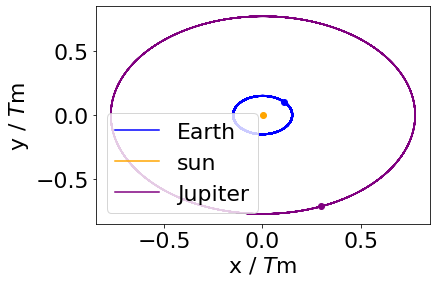

In [27]:
labels = ["Earth", "sun", "Jupiter"]
colour = ["blue", "orange", "purple"]
for i in range(len(arr_bodies)):
    #plt.plot(result["rs"][i, :, 1]/1e12, result["rs"][i, :, 0]/1e12, label=labels[i], color=colour[i])
    plt.plot(np.array(b[i].pos)[:, 0]/1e12, np.array(b[i].pos)[:, 1]/1e12, label=labels[i], color=colour[i])
    plt.scatter(np.array(b[i].pos)[-1, 0]/1e12, np.array(b[i].pos)[-1, 1]/1e12, color=colour[i])
#plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x / $T$m")
plt.ylabel("y / $T$m")
plt.legend()
plt.show()

In [28]:
##### Compute Angles #####
thetas = np.empty([len(arr_bodies), int(n_iter)])
for i in range(len(arr_bodies)):
    thetas[i, :] = theta_arr(result["rs"][i, :, :], np.pi/2)

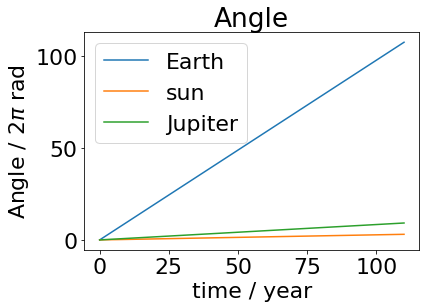

In [29]:
labels = ["Earth", "sun", "Jupiter"]
for i in range(len(arr_bodies)):
    plt.plot(result["r_ts"]/(360*24*3600), thetas[i]/(2*np.pi), label=labels[i])
plt.title("Angle")
plt.xlabel("time / year")
plt.ylabel("Angle / $2 \pi$ rad")
plt.legend()
plt.show()

In [30]:
time_100 = np.interp(100, thetas[0]/(2*np.pi), result["r_ts"]/(360*24*3600))
print("Time for 100 earth orbits:", np.round(time_100), "years")

Time for 100 earth orbits: 102.0 years


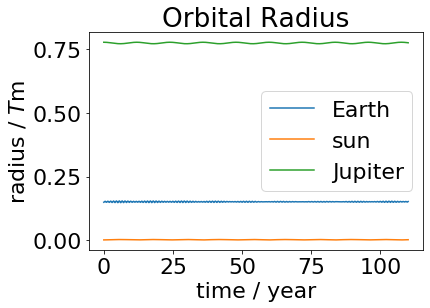

In [31]:
##### Compute Radii #####
labels = ["Earth", "sun", "Jupiter"]
for i in range(len(arr_bodies)):
    rads = norm(result["rs"][i, :, :], axis=1)
    plt.plot(result["r_ts"]/(360*24*3600), rads/1e12, label=labels[i])
plt.title("Orbital Radius")
plt.xlabel("time / year")
plt.ylabel("radius / $T$m")
plt.legend()
plt.show()

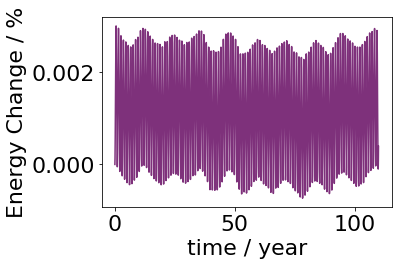

In [32]:
##### Total Energy #####
import matplotlib
##### Durham colours #####
dpi = [196.0 / 255.0, 59.0 / 255.0, 142.0 / 255.0]  # Durham pink
dr = [170.0 / 255.0, 43.0 / 255.0, 74.0 / 255.0]  # Durham red
dy = [232.0 / 255.0, 227.0 / 255.0, 145.0 / 255.0]  # Durham yellow
dg = [159.0 / 255.0, 161.0 / 255.0, 97.0 / 255.0]  # Durham green
db = [0, 99.0 / 255.0, 136.0 / 255.0]  # Durham blue
dp = [126.0 / 255.0, 49.0 / 255.0, 123.0 / 255.0]  # Durham purple
dv = [216.0 / 255.0, 172.0 / 255.0, 244.0 / 255.0]  # Durham violet
matplotlib.rcParams.update({'font.size': 22})
Etot = result["pot"]+result["Eks"]
plt.plot(result["r_ts"]/(360*24*3600), 100*(Etot-Etot[0])/Etot[0], color=dp)
#plt.title("Total Energy")
plt.xlabel("time / year", fontname="Times New Roman")
plt.ylabel("Energy Change / %", fontname="Times New Roman")
plt.tight_layout()
plt.savefig('milestoneEnergy.png', dpi=1000)
#plt.show()

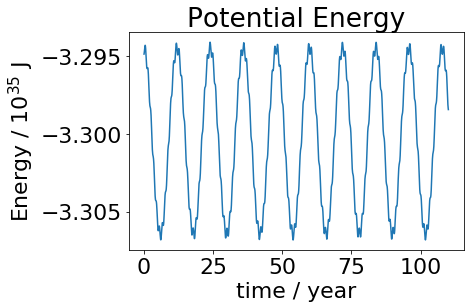

In [33]:
##### Potential Energy #####
plt.plot(result["r_ts"]/(360*24*3600), result["pot"]/10**35)
plt.title("Potential Energy")
plt.xlabel("time / year")
plt.ylabel("Energy / $10^{35}$ J")
plt.show()

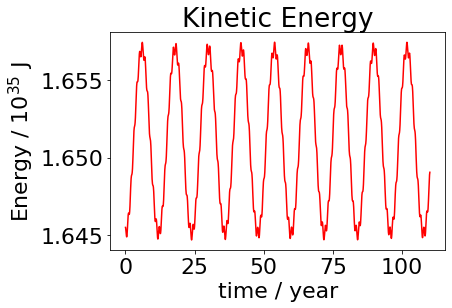

In [34]:
##### Kinetic Energy
plt.plot(result["r_ts"]/(360*24*3600), result["Eks"]/10**35, color="red")
plt.title("Kinetic Energy")
plt.xlabel("time / year")
plt.ylabel("Energy / $10^{35}$ J")
plt.show()

In [35]:
print("Total energy difference:", str(1e4*100*(Etot[len(Etot)-1]-Etot[0])/Etot[0])[0:5], "e^(-4)%")

Total energy difference: 3.921 e^(-4)%
